# **Практика 6: Атака по переносу (`Transfer Attack`) на модели ИИ**

По предмету: **Анализ защищенности систем искусственного интеллекта**

Выполнил студент **2 курса** группы **ББМО-02-23**

**Панков Евгений Ромуальдович**

##**Цель задания:**
Изучить концепцию атаки по переносу, где противоречивые примеры, созданные для одной модели, используются для атаки на другую модель. Это задание требует создания нескольких моделей, генерации противоречивых примеров для одной модели и проверки их на другой модели.

##**Задачи:**
1. Загрузить несколько моделей, обученных на датасете `MNIST`.
2. Изучить теоретические основы атаки по переносу.
3. Реализовать атаку `FGSM` на одну модель и проверить, как противоречивые примеры влияют на другую модель.
4. Оценить точность обеих моделей на противоречивых примерах и проанализировать переносимость атак.

##**Шаги выполнения:**

###**Шаг 1: Загрузка и создание двух различных моделей**

#### **Создаем две модели на датасете `MNIST`: одну простую полносвязную сеть и одну свёрточную нейронную сеть (`CNN`)**

**Загрузка нужных библиотек:**

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

**Загрузка датасета MNIST и нормализация данных:**

In [2]:
# Загрузка датасета MNIST:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# Нормализация данных:
train_images = train_images / 255.0
test_images = test_images / 255.0
# Преобразование меток в one-hot encoding:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**Создание простой полносвязной модели на датасете MNIST с проверкой точности и сохранением:**

In [5]:
# Создание простой полносвязной модели:
model1 = Sequential([Flatten(input_shape=(28, 28)), Dense(128, activation='relu'), Dense(10, activation='softmax')])
# Компиляция модели:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Обучение модели:
model1.fit(train_images, train_labels, epochs=5)
# Проверка точности модели на обычных данных:
test_loss, test_acc = model1.evaluate(test_images, test_labels)
print(f'Test accuracy on clean images: {test_acc}')
# Сохранение модели:
model1.save('mnist_model_fully_connected.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8729 - loss: 0.4416
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9646 - loss: 0.1217
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9758 - loss: 0.0795
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9832 - loss: 0.0561
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9864 - loss: 0.0453
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9661 - loss: 0.1171


Test accuracy on clean images: 0.9696999788284302


**Создание свёрточной нейронной сети на датасете MNIST с проверкой точности и сохранением:**

In [6]:
# Создание модели свёрточной нейронной сети:
model2 = Sequential([Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)), MaxPooling2D((2, 2)), Flatten(), Dense(128, activation='relu'),
                     Dense(10, activation='softmax')])
# Компиляция модели:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Обучение модели:
model2.fit(train_images, train_labels, epochs=5)
# Проверка точности модели на обычных данных:
test_loss, test_acc = model2.evaluate(test_images, test_labels)
print(f'Test accuracy on clean images: {test_acc}')
# Сохранение модели:
model2.save('mnist_model_сonvolutional.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9168 - loss: 0.2852
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9830 - loss: 0.0538
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 22ms/step - accuracy: 0.9912 - loss: 0.0291
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9948 - loss: 0.0167
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 22ms/step - accuracy: 0.9957 - loss: 0.0132
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9804 - loss: 0.0677


Test accuracy on clean images: 0.984499990940094


###**Шаг 2: Теория атаки по переносу**

 Атака по переносу — это метод, при котором противоречивые примеры, созданные для одной модели, применяются к другой модели. Это возможно, потому что модели часто имеют схожие слабости и могут совершать одинаковые ошибки на определенных данных, даже если они обучены на разных архитектурах.

 В этом задании мы создадим противоречивые примеры для первой модели с помощью `FGSM` и затем проверим, насколько эти примеры могут атаковать вторую модель.

###**Шаг 3: Реализация атаки `FGSM` на первую модель (полносвязную)**

**Применим атаку `FGSM` (`Fast Gradient Sign Method`) к первой модели, чтобы создать противоречивые примеры:**

In [17]:
import numpy as np
# Функция для реализации FGSM атаки:
def fgsm_attack(image, epsilon, gradient):
  # Применение знака градиента к изображению:
  perturbed_image = image + epsilon * np.sign(gradient)
  # Обрезка значений, чтобы они оставались в пределах [0,1]:
  perturbed_image = np.clip(perturbed_image, 0, 1)
  return perturbed_image
# Вычисление градиента:
def generate_adversarial_example(model, images, labels, epsilon):
    adversarial_images = []
    # Превращение изображения в формат, подходящий для модели:
    for i in range(len(images)):
      image = tf.convert_to_tensor(images[i].reshape((1, 28, 28, 1)))
      label = labels[i]
      # Преобразование label (one-hot вектора) в индекс:
      if len(label.shape) > 1 and label.shape[1] > 1:
          label = np.argmax(label),
      label = tf.convert_to_tensor(label)
      with tf.GradientTape() as tape:
          tape.watch(image)
          prediction = model(image)
          loss = tf.keras.losses.categorical_crossentropy(label[None], prediction)
      gradient = tape.gradient(loss, image)
      # Применяем FGSM:
      adversarial_image = fgsm_attack(image.numpy(), epsilon, gradient.numpy())
      adversarial_images.append(np.reshape(adversarial_image, (28, 28, 1)))
    return np.array(adversarial_images)
epsilon = 0.1
# Создание противоречивых изображения для простой полносвязной модели:
adversarial_example = generate_adversarial_example(model1, test_images, test_labels, epsilon)

**Визуализируем результат проведенной атаки:**

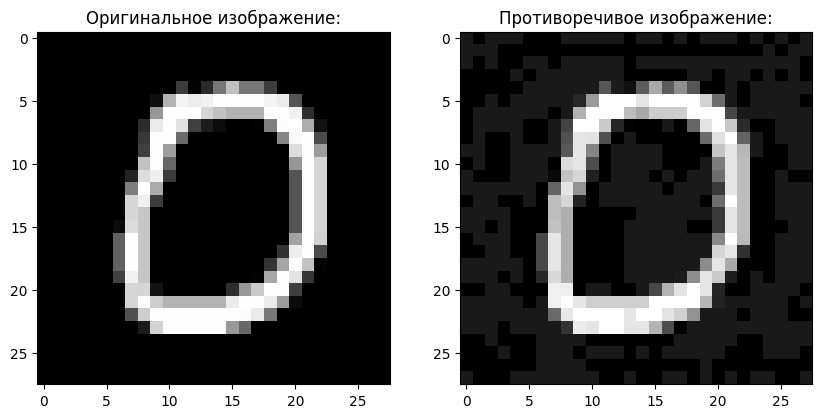

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Оригинальное изображение:")
plt.imshow(test_images[10], cmap="gray")
plt.subplot(1, 2, 2)
plt.title("Противоречивое изображение:")
plt.imshow(adversarial_example[10].reshape(28, 28), cmap="gray")
plt.show()

###**Шаг 4: Оценка противоречивых примеров на обеих моделях**

Теперь мы проверим, как эти противоречивые примеры влияют на обе модели — первую, для которой они были созданы, и вторую, которая их не видела.

In [15]:
# Оценка полносвязной модели на противоречивых примерах:
adversarial_loss1, adversarial_acc1 = model1.evaluate(adversarial_example.reshape(10000, 28, 28),
test_labels)
# Оценка свёрточной модели на противоречивых примерах:
adversarial_loss2, adversarial_acc2 = model2.evaluate(adversarial_example.reshape(10000, 28, 28),
test_labels)
print(f'Точность полносвязной модели: {adversarial_acc1}')
print(f'Точность свёрточной модели: {adversarial_acc2}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0817 - loss: 7.2963
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9498 - loss: 0.1690
Точность полносвязной модели: 0.10400000214576721
Точность свёрточной модели: 0.9567000269889832


###**Шаг 5: Реализация атаки `FGSM` на вторую модель (свёрточную)**

**Применим атаку `FGSM` (`Fast Gradient Sign Method`) к первой модели, чтобы создать противоречивые примеры:**

In [18]:
# Создание противоречивых изображений для свёрточной модели:
adversarial_example1 = generate_adversarial_example(model2, test_images, test_labels, epsilon)

**Визуализируем результат проведенной атаки:**

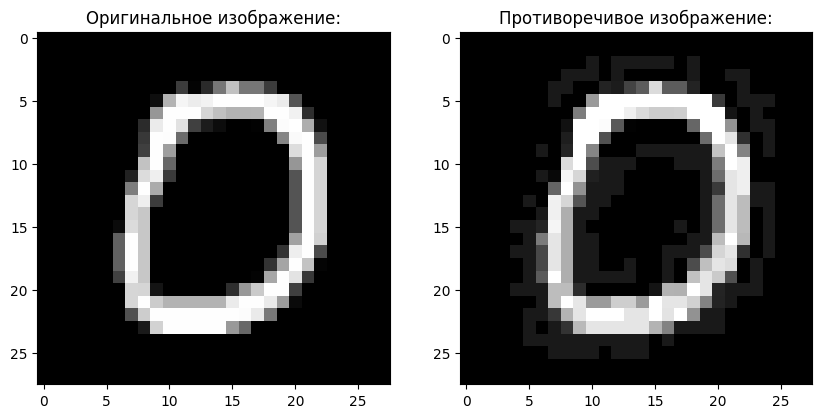

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Оригинальное изображение:")
plt.imshow(test_images[10], cmap="gray")
plt.subplot(1, 2, 2)
plt.title("Противоречивое изображение:")
plt.imshow(adversarial_example1[10].reshape(28, 28), cmap="gray")
plt.show()

###**Шаг 6: Оценка противоречивых примеров на обеих моделях**

In [20]:
# Оценка полносвязной модели на противоречивых примерах:
adversarial_loss3, adversarial_acc3 = model1.evaluate(adversarial_example1.reshape(10000, 28, 28),
test_labels)
# Оценка свёрточной модели на противоречивых примерах:
adversarial_loss4, adversarial_acc4 = model2.evaluate(adversarial_example1.reshape(10000, 28, 28),
test_labels)
print(f'Точность полносвязной модели: {adversarial_acc3}')
print(f'Точность свёрточной модели: {adversarial_acc4}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9501 - loss: 0.1608
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6675 - loss: 1.3399
Точность полносвязной модели: 0.9562000036239624
Точность свёрточной модели: 0.6888999938964844


###**Шаг 7: Анализ переносимости атак**

**Посмотрим результат на чистых примерах:**
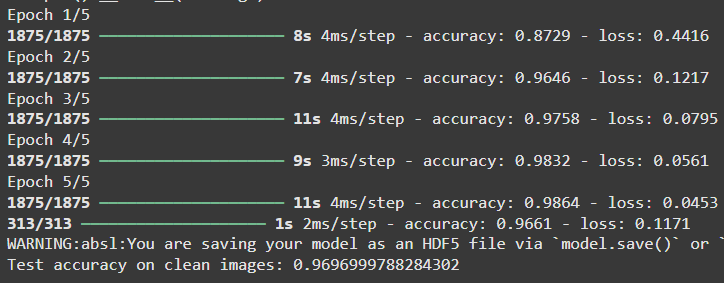




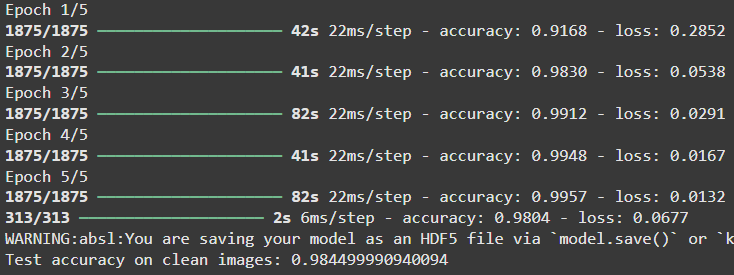

**Посмотрим на результат первого эксперимента:**
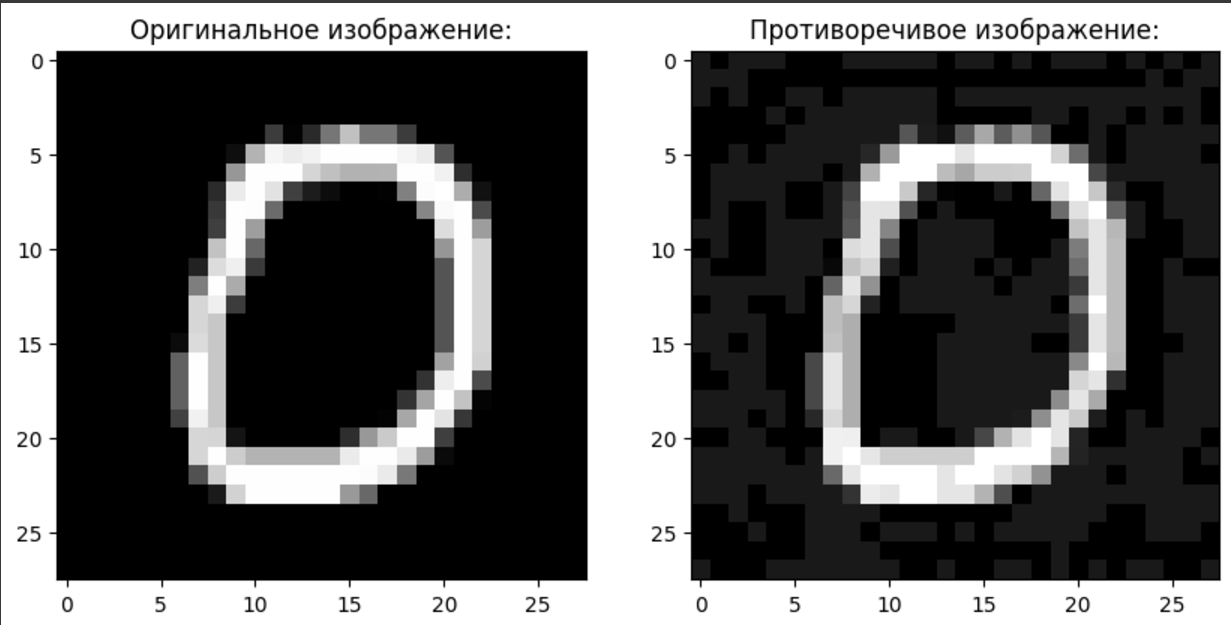

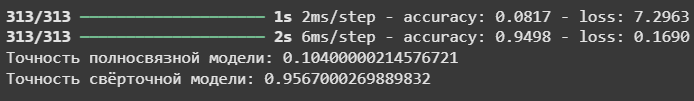

**Вывод:** Атака, как видно, оказала незначительное влияние на точность свёрточной модели, снизив её всего на примерно 2.5%. Это свидетельствует о том, что атака слабо переносится с полносвязной модели на свёрточную.

**Теперь посмторим результат второго эксперимента:**
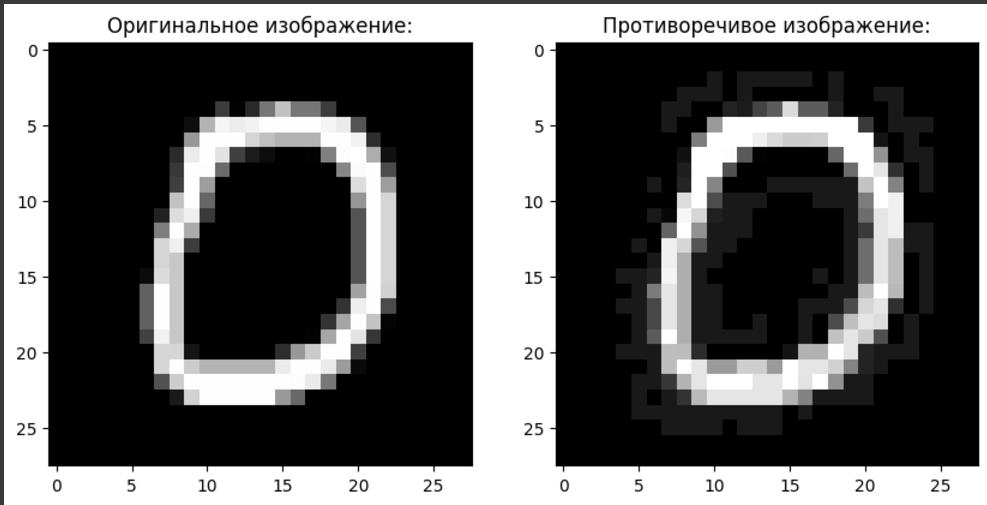

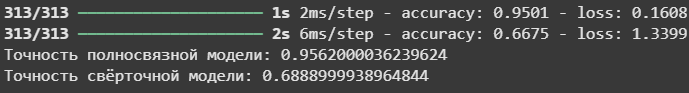

**Вывод:** Ситуация совершенно противоположная: теперь свёрточная модель демонстрирует низкую точность, всего 68%, в то время как на полносвязную модель атака оказала незначительное влияние, снизив её точность примерно на 1.5%. Также сразу заметна разница в помехах на изображении

#### **Вывод:** Атака `FGSM` между моделями переносится плохо. Как видно, свёрточная модель показала лишь небольшое снижение точности, всего на 2.5%, в то время как полносвязная модель практически не пострадала от атаки, потеряв лишь около 1.5% точности. Однако в противоположной ситуации свёрточная модель продемонстрировала значительно худшие результаты, снизив свою точность до 68%. Это подчеркивает, что атака `FGSM` неэффективно переносится между полносвязными и свёрточными моделями.